# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [2]:
with open('english.10MB', encoding='iso-8859-1') as f:
    text = f.readlines()
    text = ''.join(text)

### Zadanie 2
Zamień wszystkie litery na małe.


In [3]:
text = text.lower()

### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


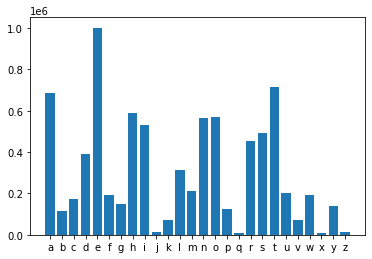

In [4]:
import numpy as np
from string import ascii_letters
import matplotlib.pyplot as plt
from collections import Counter

c = Counter(text)
chars_occurance = c.most_common()
letters_occurance = [occ for occ in chars_occurance if occ[0] in ascii_letters]
letters_occurance = sorted(letters_occurance, key=lambda x: x[0])

fig, ax = plt.subplots()
ax.bar([occ[0] for occ in letters_occurance], [occ[1] for occ in letters_occurance]);

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [5]:
import re
from collections import Counter

def get_probable_letters(prefix):
    matches = re.findall(prefix+r'(.)', text)
    occs = Counter(matches)
    common_letters = [occ[0] for occ in occs.most_common() if occ[0] in ascii_letters]
    return common_letters[:5]

get_probable_letters('th')

['e', 'a', 'i', 'o', 'y']

### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.

> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [6]:
import ipywidgets as widgets

input_ = widgets.Text(
    value='',
    placeholder='Type something',
    description='String:',
    disabled=False
)

output = widgets.HTML(
    value='',
    placeholder='Type something...',
    description='Output:',
)

def update_output(e):
    text = input_.value
    if len(text) == 0:
        output.value = ''
        return
    letters = get_probable_letters(text)
    output.value = str(get_probable_letters(text))

layout = widgets.VBox([input_, output])
input_.observe(update_output, names='value')
display(layout)

### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [6]:
def get_probable_words(word):
    matches = re.findall(word + r'\s(\w+)', text)
    occs = Counter(matches)
    common_words = [occ[0] for occ in occs.most_common()]
    return common_words[:5]

In [9]:
print('Naciśnij enter aby zakończyć')

words = []

while True:
    
    # Get input
    input_ = input('Podaj słowo:')
    
    # Stop condition
    if len(input_) == 0:
        break
    
    # Convert input to word index if possible
    try:
        index = int(input_)-1
        if not 0 <= index < len(words):
            print('Nieprawidłowy numer słowa')
            continue
        input_ = words[index]
    except ValueError:
        pass
    
    # Show possible continuations
    words = get_probable_words(input_)
    print(f'Możliwe kontynuacje dla {input_}: {words}')

print('Zakończono')

Naciśnij enter aby zakończyć


Podaj słowo: magic


Możliwe kontynuacje dla magic: ['and', 'of', 'might', 'glow', 'spell']


Podaj słowo: and


Możliwe kontynuacje dla and: ['the', 'he', 'said', 'i', 'she']


Podaj słowo: 1


Możliwe kontynuacje dla the: ['king', 'caliph', 'dawn', 'old', 'wazir']


Podaj słowo: 


Zakończono
